In [3]:
import os
import sys

import pandas as pd
import numpy as np
import math

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [4]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(1,4) # [,1,2]
    for i in pq_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,0,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, 0, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: %6.5f | order: %s'%(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [5]:
df = pd.read_csv("AlphaMergedV2.csv")  

df2 = df[df['name'] == 'BRK-B']
close = df2.close
time = df2.timestamp
df2 = pd.concat([close, time], axis = 1)

df2.set_index('timestamp', inplace = True)
close = df2.iloc[::-1]
close.head()

,close
timestamp,
1998-01-23,1647.0
1998-01-26,1644.0
1998-01-27,1664.0
1998-01-28,1670.0
1998-01-29,1687.0


In [6]:
# log returns
lrets = np.log(close['close']/close['close'].shift(1)).fillna(0)
lrets.head()

timestamp
1998-01-23    0.000000
1998-01-26   -0.001823
1998-01-27    0.012092
1998-01-28    0.003599
1998-01-29    0.010128
Name: close, dtype: float64

In [7]:
print(lrets[5268:5270])  # 2019 Jan starts from index 5269, ends at index 5289, step 21

print(lrets[5290:5292])   # 2019 Feb starts from index 5290, ends at index 5308, step 19

print(lrets[5309:5311])   # 2019 Mar starts from index 5309, ends at index 5329, step 21
print(lrets[5329:5331])  

timestamp
2018-12-31    0.010338
2019-01-02   -0.006782
Name: close, dtype: float64
timestamp
2019-02-01    0.017602
2019-02-04   -0.003208
Name: close, dtype: float64
timestamp
2019-03-01    0.00905
2019-03-04   -0.00652
Name: close, dtype: float64
timestamp
2019-03-29    0.001146
2019-04-01    0.020252
Name: close, dtype: float64


In [8]:
JanS = 5269
JanE = 5289

FebS = 5290
FebE = 5308

MarS = 5309
MarE = 5329

# Jan

In [9]:
# predict for 2019 Jan
TS1 = lrets[1:JanS-1]    # change index

res_tup = _get_best_model(TS1)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=22, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -15560.31355 | order: (2, 0, 1)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21,h.22
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-12-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,...,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013,-0.005013


In [10]:
preJan = 0*lrets[JanS:JanE+1]
for d in range(len(preJan)):
    if d+1 < 9:
        colname = 'h.0' + str(d+1+1)
    else:
        colname = 'h.' + str(d+1+1)    
    preJan.iloc[d] = out.mean[colname].iloc[-1]

In [11]:
retsJan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
retsJan['Real value'] = lrets[JanS:JanE+1]
retsJan['Prediction'] = preJan 

Jan = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
Jan['Real value']=retsJan['Real value'].cumsum()
Jan['Prediction'] = retsJan['Prediction'].cumsum()

JanReverse = pd.DataFrame(index = preJan.index, columns=['Real value', 'Prediction'])
JanReverse['Real value'] = Jan['Real value'] + np.log(close[JanS - 1:JanS])['close'].iloc[0] # add log of real value of 2018/12/31
JanReverse['Prediction'] = Jan['Prediction'] + np.log(close[JanS - 1:JanS])['close'].iloc[0]

for d in range(len(preJan)):
    JanReverse['Real value'].iloc[d] = math.exp( JanReverse['Real value'].iloc[d] )  # reverse log
    JanReverse['Prediction'].iloc[d] = math.exp( JanReverse['Prediction'].iloc[d] )
    
JanReverse

,Real value,Prediction
timestamp,,
2019-01-02,202.80,203.158976
2019-01-03,191.66,202.143059
2019-01-04,195.20,201.132221
2019-01-07,196.91,200.126438
2019-01-08,196.31,199.125685
2019-01-09,196.37,198.129936
2019-01-10,196.58,197.139167
2019-01-11,196.29,196.153352
2019-01-14,195.78,195.172466


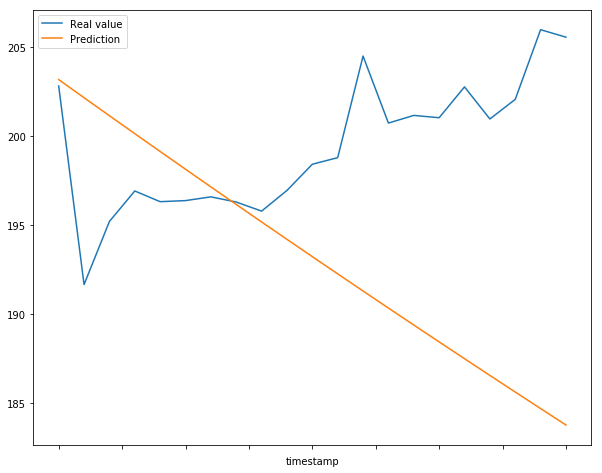

In [12]:
JanReverse['Real value'].plot(figsize=(10,8))
JanReverse['Prediction'].plot()
plt.legend()
plt.show()

# Feb

In [13]:
# predict for 2019 Feb
TS2 = lrets[1:FebS]    # change index

res_tup = _get_best_model(TS2)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=19, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -15645.55117 | order: (2, 0, 1)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19
timestamp,,,,,,,,,,,,,,,,,,,
2019-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265,-0.000265


In [14]:
preFeb = 0*lrets[FebS:FebE+1]
for d in range(len(preFeb)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preFeb.iloc[d] = out.mean[colname].iloc[-1]

In [15]:
retsFeb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
retsFeb['Real value'] = lrets[FebS:FebE+1]
retsFeb['Prediction'] = preFeb

Feb = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
Feb['Real value']=retsFeb['Real value'].cumsum()
Feb['Prediction'] = retsFeb['Prediction'].cumsum()

FebReverse = pd.DataFrame(index = preFeb.index, columns=['Real value', 'Prediction'])
FebReverse['Real value'] = Feb['Real value'] + np.log(close[FebS-1:FebS])['close'].iloc[0] # add log of real value at 2018/12/31
FebReverse['Prediction'] = Feb['Prediction'] + np.log(close[FebS-1:FebS])['close'].iloc[0]

for d in range(len(preFeb)):
    FebReverse['Real value'].iloc[d] = math.exp( FebReverse['Real value'].iloc[d] )  # reverse log
    FebReverse['Prediction'].iloc[d] = math.exp( FebReverse['Prediction'].iloc[d] )
    
FebReverse

,Real value,Prediction
timestamp,,
2019-02-01,209.19,205.485497
2019-02-04,208.52,205.431009
2019-02-05,207.82,205.376535
2019-02-06,206.01,205.322075
2019-02-07,201.73,205.267630
2019-02-08,200.92,205.213199
2019-02-11,203.05,205.158783
2019-02-12,206.15,205.104381
2019-02-13,205.80,205.049994


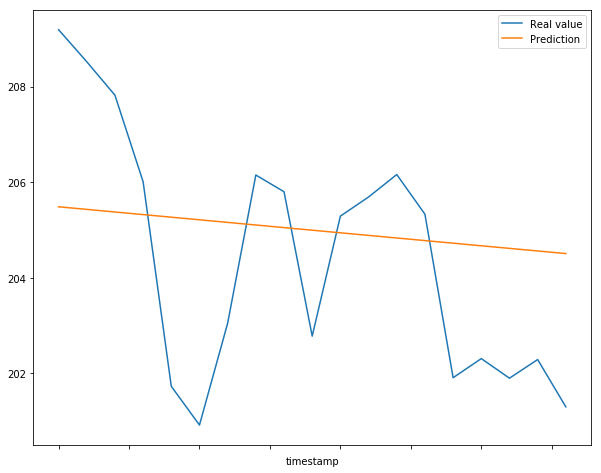

In [16]:
FebReverse['Real value'].plot(figsize=(10,8))
FebReverse['Prediction'].plot()
plt.legend()
plt.show()

# Mar

In [17]:
# predict for 2019 Mar
TS3 = lrets[1:MarS]    # change index

res_tup = _get_best_model(TS3)
order = res_tup[1]
model = res_tup[2]

p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
out = res.forecast(horizon=21, start=None, align='origin')   # change horizon
#horizon : int, optional  Number of steps to forecast

out.mean.tail()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

aic: -15720.18433 | order: (2, 0, 1)


/anaconda3/lib/python3.6/site-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.12,h.13,h.14,h.15,h.16,h.17,h.18,h.19,h.20,h.21
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,...,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269,0.000269


In [18]:
preMar = 0*lrets[MarS:MarE+1]
for d in range(len(preMar)):
    if d < 9:
        colname = 'h.0' + str(d+1)
    else:
        colname = 'h.' + str(d+1)    
    preMar.iloc[d] = out.mean[colname].iloc[-1]

In [19]:
retsMar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
retsMar['Real value'] = lrets[MarS:MarE+1]
retsMar['Prediction'] = preMar 

Mar = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
Mar['Real value']=retsMar['Real value'].cumsum()
Mar['Prediction'] = retsMar['Prediction'].cumsum()

MarReverse = pd.DataFrame(index = preMar.index, columns=['Real value', 'Prediction'])
MarReverse['Real value'] = Mar['Real value'] + np.log(close[MarS-1:MarS])['close'].iloc[0] # add log of real value at 2018/12/31
MarReverse['Prediction'] = Mar['Prediction'] + np.log(close[MarS-1:MarS])['close'].iloc[0]

for d in range(len(preMar)):
    MarReverse['Real value'].iloc[d] = math.exp( MarReverse['Real value'].iloc[d] )  # reverse log
    MarReverse['Prediction'].iloc[d] = math.exp( MarReverse['Prediction'].iloc[d] )
    
MarReverse

,Real value,Prediction
timestamp,,
2019-03-01,203.13,201.354095
2019-03-04,201.81,201.408205
2019-03-05,201.47,201.462329
2019-03-06,200.67,201.516468
2019-03-07,199.30,201.570621
2019-03-08,198.70,201.624789
2019-03-11,202.09,201.678971
2019-03-12,202.50,201.733168
2019-03-13,204.06,201.787379


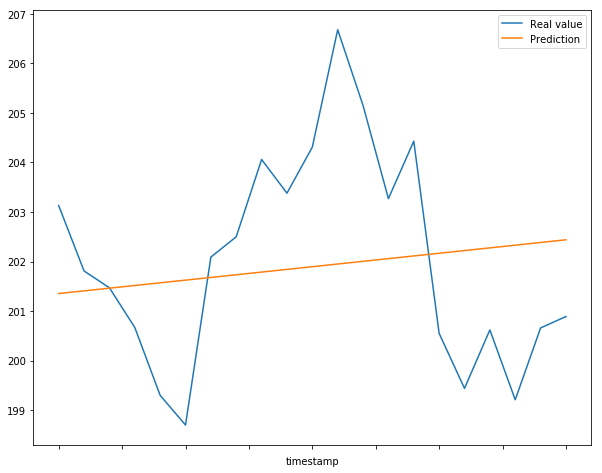

In [20]:
MarReverse['Real value'].plot(figsize=(10,8))
MarReverse['Prediction'].plot()
plt.legend()
plt.show()

# Combine Dataframes of 3 months

In [22]:
BRK_B = pd.concat([JanReverse, FebReverse, MarReverse])
BRK_B.columns = ['BRK-B real value', 'BRK-B prediction']
BRK_B.to_csv('BRK-B_pred.csv')